## From the article

# Implementing a distance-based classifier with a quantum interference circuit

###  M. Schuld et al 2017 EPL 119 60002

## Let's make the detector multiclass

# Preparing the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris = pd.read_csv("Iris/iris.data",header=None,names=["f0","f1","f2","f3","class"])

In [4]:
setosa = iris[iris["class"] == "Iris-setosa"]
# setosa.loc[:,"class"] = -1
setosa.loc[:,"color"] = "Green"

In [5]:
versicolor = iris[iris["class"] == "Iris-versicolor"]
# versicolor.loc[:,"class"] = 1
versicolor.loc[:,"color"] = "Blue"

In [6]:
virginica = iris[iris["class"] == "Iris-virginica"]
# virginica.loc[:,"class"] = 1
virginica.loc[:,"color"] = "Red"

In [7]:
data = pd.concat([setosa,versicolor,virginica])

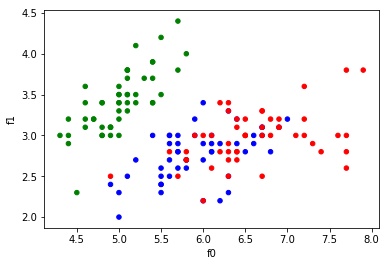

In [9]:
data.plot.scatter(x="f0", y="f1", c=data.color)

In [10]:
data.loc[:,["f0","f1","f2","f3"]].describe()

,f0,f1,f2,f3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# data.mean()
# data["f0"] -= data.mean()[0]
# data["f1"] -= data.mean()[1]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.loc[:,["f0","f1","f2","f3"]] = scaler.fit_transform(data.loc[:,["f0","f1","f2","f3"]])

In [12]:
data.loc[:,["f0","f1","f2","f3"]].describe()

,f0,f1,f2,f3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


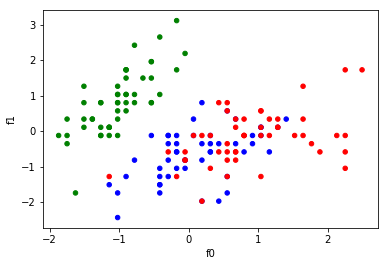

In [13]:
data.plot.scatter(x="f0", y="f1", c=data.color)

In [14]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

In [15]:
for i in data.index:
    v = [data["f0"][i],data["f1"][i],data["f2"][i],data["f3"][i]]
    v = normalize(v)
    data.loc[i,"f0"], data.loc[i,"f1"], data.loc[i,"f2"], data.loc[i,"f3"] = v[0], v[1], v[2], v[3]

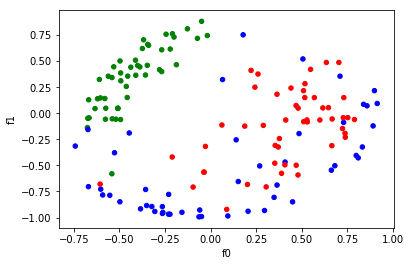

In [16]:
data.plot.scatter(x="f0", y="f1", c=data.color)

In [17]:
vectors = data.loc[[33,   85, 145, 28,  36,  50,  53,  149],["f0","f1","f2","f3","class"]]
vectors["label"] = ["t0","t1","t2","x0","x1","x2","x3","x4"]
vectors["class bit"] = ["00","01","10","00","00","01","01","10"]
vectors

,f0,f1,f2,f3,class,label,class bit
33,-0.127009,0.809627,-0.409495,-0.400856,Iris-setosa,t0,00
85,0.178324,0.752125,0.396013,0.495663,Iris-versicolor,t1,01
145,0.528233,-0.063590,0.417101,0.736854,Iris-virginica,t2,10
28,-0.356854,0.366533,-0.614023,-0.601069,Iris-setosa,x0,00
36,-0.187611,0.465434,-0.630528,-0.592122,Iris-setosa,x1,00
50,0.898149,0.216508,0.343042,0.169631,Iris-versicolor,x2,01
53,-0.230622,-0.967249,0.076079,0.073856,Iris-versicolor,x3,01
149,0.061982,-0.112801,0.688551,0.713675,Iris-virginica,x4,10


In [18]:
vectors.iloc[:,0:4].apply(np.arcsin)

,f0,f1,f2,f3
33,-0.127353,0.943517,-0.421901,-0.412451
85,0.179283,0.851281,0.407170,0.518598
145,0.556518,-0.063633,0.430253,0.828405
28,-0.364899,0.375280,-0.661148,-0.644839
36,-0.188729,0.484125,-0.682233,-0.633689
50,1.115542,0.218237,0.350153,0.170455
53,-0.232717,-1.314159,0.076153,0.073923
149,0.062022,-0.113041,0.759489,0.794731


In [19]:
t0 = vectors.iloc[0:1,0:4].apply(np.arcsin).to_numpy()[0]

In [20]:
t1 = vectors.iloc[1:2,0:4].apply(np.arcsin).to_numpy()[0]

In [21]:
t2 = vectors.iloc[2:3,0:4].apply(np.arcsin).to_numpy()[0]

In [22]:
x0 = vectors.iloc[3:4,0:4].apply(np.arcsin).to_numpy()[0]

In [23]:
x1 = vectors.iloc[4:5,0:4].apply(np.arcsin).to_numpy()[0]

In [24]:
x2 = vectors.iloc[5:6,0:4].apply(np.arcsin).to_numpy()[0]

In [25]:
x3 = vectors.iloc[6:7,0:4].apply(np.arcsin).to_numpy()[0]

In [26]:
x4 = vectors.iloc[7:8,0:4].apply(np.arcsin).to_numpy()[0]

# Building the quantum circuit

To store 4 features I need 2 $i$ qubits.  
To store 3 classes I need 2 $c$ quibits.  
To store 3 training vectors I need 2 $m$ qubits.  
I need some ancilla qubits for the QRAM routine.  
I need one more bit to store the conditional measurement on the rotation qubit. 

In [27]:
import qiskit
from qiskit import IBMQ
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    ClassicalRegister,
    execute,
    Aer)
from qiskit.visualization import plot_histogram
import qiskit.aqua.circuits.gates.controlled_ry_gates

In [28]:
def encodeVector(circuit,data,i,controls,rotationQubit,ancillaQubits):
    # |00>
    circuit.x(i)
    circuit.mcry(data[0],controls,rotationQubit,ancillaQubits)
    circuit.x(i)
    
    # |01>
    circuit.x(i[1])
    circuit.mcry(data[1],controls,rotationQubit,ancillaQubits)
    circuit.x(i[1])
    
    # |10>
    circuit.x(i[0])
    circuit.mcry(data[2],controls,rotationQubit,ancillaQubits)
    circuit.x(i[0])
    
    # |11>
    circuit.mcry(data[3],controls,rotationQubit,ancillaQubits)

In [29]:
a = QuantumRegister(1,'a')
m = QuantumRegister(2,'m')
i = QuantumRegister(2,'i')
r = QuantumRegister(1,'r')
q = QuantumRegister(5,'q')
c = QuantumRegister(2,'c')
b = ClassicalRegister(4, 'bit')
circuit = QuantumCircuit(a,m,i,r,q,c,b)

circuit.h(a)
circuit.h(m)
circuit.h(i)
circuit.h(c)

circuit.barrier()

# circuit.cry(theta, control, target)
# circuit.mcry(theta, controls, target, ancillae)

# >>> Encode the input vector >>>

encodeVector(circuit,t2,i,a[:]+i[:],r[0],q)

circuit.x(a)

# <<< Encode the input vector <<<

circuit.barrier()

# >>> Encode the first training vector >>>

circuit.x(c)
circuit.x(m)

encodeVector(circuit,t0,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c)
circuit.x(m)

# <<< Encode the first training vector <<<

circuit.barrier()

# >>> Encode the second training vector >>>

circuit.x(c[1])
circuit.x(m[1])

encodeVector(circuit,t1,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c[1])
circuit.x(m[1])

# <<< Encode the second training vector <<<

circuit.barrier()

# >>> Encode the third training vector >>>

circuit.x(c[0])
circuit.x(m[0])

encodeVector(circuit,t2,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c[0])
circuit.x(m[0])

# <<< Encode the third training vector <<<

# >>> Encode the fourth training vector >>>

circuit.x(c[0])

encodeVector(circuit,x4,i,a[:]+i[:]+m[:]+c[:],r[0],q)

circuit.x(c[0])

# <<< Encode the fourth training vector <<<

circuit.barrier()

circuit.measure(r,b[0])

circuit.h(a)

circuit.measure(a,b[1])
circuit.measure(c[0],b[2])
circuit.measure(c[1],b[3])

# circuit.draw(output='mpl')


Total counts are: {'0101': 102, '0111': 68, '0001': 69, '1001': 169, '1100': 4023, '1010': 4, '0100': 3905, '0000': 3860, '1011': 41, '1111': 80, '1000': 3877, '0011': 110, '1110': 1, '0110': 3, '1101': 72}


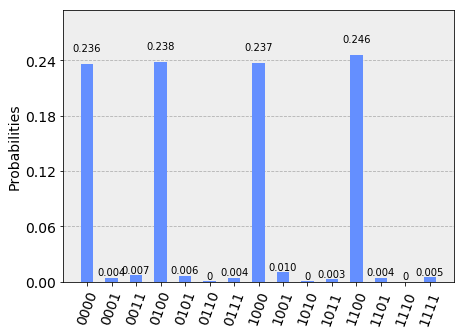

In [30]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=16384)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal counts are:",counts)
plot_histogram(counts)

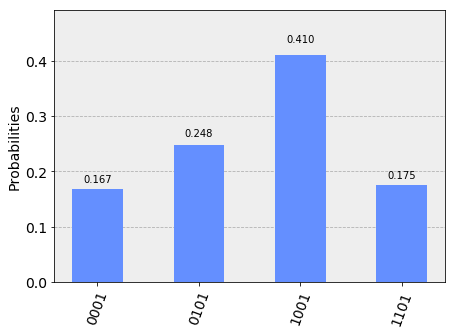

In [31]:
goodCounts = {k: counts[k] for k in counts.keys() & {'0001','0101','1001','1101'}}
plot_histogram(goodCounts)